---
# Welcome to CE880
### This is your week-10 : Problem notebook

For this problem set, we'll be using the Jupyter notebook and please upload this notebook to [Google Colab](https://colab.research.google.com/). 

Paris Housing is a set of data created from imaginary data of house prices in an urban environment. 
https://github.com/sagihaider/CE880_2021/blob/main/Data/ParisHousingClass.csv 

All attributes are numeric variables and they are listed bellow:
* squareMeters
* numberOfRooms
* hasYard
* hasPool
* floors - number of floors
* cityCode - zip code
* cityPartRange - the higher the range, the more exclusive the neighbourhood is
* numPrevOwners - number of prevoious owners
* made - year
* isNewBuilt
* hasStormProtector
* basement - basement square meters
* attic - attic square meteres
* garage - garage size
* hasStorageRoom
* hasGuestRoom - number of guest rooms
* price - price of a house
* category - Luxury or Basic

In [139]:
import numpy as np 
import pandas as pd 
url = 'https://raw.githubusercontent.com/sagihaider/CE880_2021/main/Data/ParisHousingClass.csv'
trainData = pd.read_csv(url,index_col=0)
print(trainData.head())


              numberOfRooms  hasYard  hasPool  floors  cityCode  \
squareMeters                                                      
75523                     3        0        1      63      9373   
80771                    39        1        1      98     39381   
55712                    58        0        1      19     34457   
32316                    47        0        0       6     27939   
70429                    19        1        1      90     38045   

              cityPartRange  numPrevOwners  made  isNewBuilt  \
squareMeters                                                   
75523                     3              8  2005           0   
80771                     8              6  2015           1   
55712                     6              8  2021           0   
32316                    10              4  2012           0   
70429                     3              7  1990           1   

              hasStormProtector  basement  attic  garage  hasStorageRoom  \
squar

In [140]:
from sklearn.preprocessing import LabelEncoder

def label_encoded(feat):
    le=LabelEncoder()
    le.fit(feat)
    print(feat.name,le.classes_)
    return le.transform(feat)
trainData['category']=label_encoded(trainData['category'])
#'Luxury' is represented by a ㄅ and 'Basic' is represented by a 0.

category ['Basic' 'Luxury']


In [141]:
trainData.max()
#category is object

numberOfRooms             100.0
hasYard                     1.0
hasPool                     1.0
floors                    100.0
cityCode                99953.0
cityPartRange              10.0
numPrevOwners              10.0
made                     2021.0
isNewBuilt                  1.0
hasStormProtector           1.0
basement                10000.0
attic                   10000.0
garage                   1000.0
hasStorageRoom              1.0
hasGuestRoom               10.0
price                10006771.2
category                    1.0
dtype: float64

In [142]:
trainData.min()
#category is object

numberOfRooms            1.0
hasYard                  0.0
hasPool                  0.0
floors                   1.0
cityCode                 3.0
cityPartRange            1.0
numPrevOwners            1.0
made                  1990.0
isNewBuilt               0.0
hasStormProtector        0.0
basement                 0.0
attic                    1.0
garage                 100.0
hasStorageRoom           0.0
hasGuestRoom             0.0
price                10313.5
category                 0.0
dtype: float64

In [143]:
trainData.isnull()
# To detect the missing values

,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
squareMeters,,,,,,,,,,,,,,,,,
75523,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
80771,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
55712,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32316,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
70429,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1726,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
44403,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
83841,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [144]:
from sklearn.model_selection import train_test_split,GridSearchCV
#split the data in a dataset into training and testing sets.
y=trainData['category']
x=trainData.drop('category',axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

---
## Question 1: 

#### Classification
Use the dataset, which I have spilted into training and test sets (xtrain, xtest, ytrain, ytest), please train the machine learning model to get the test accuracy of 100%. You are free to use any classication model such as Decision Tree, Random Forest, KNN, SVM..etc. 

Hint: Please use grid search to find a best model using different parameters. 

# Visualization


Relation between each attribute




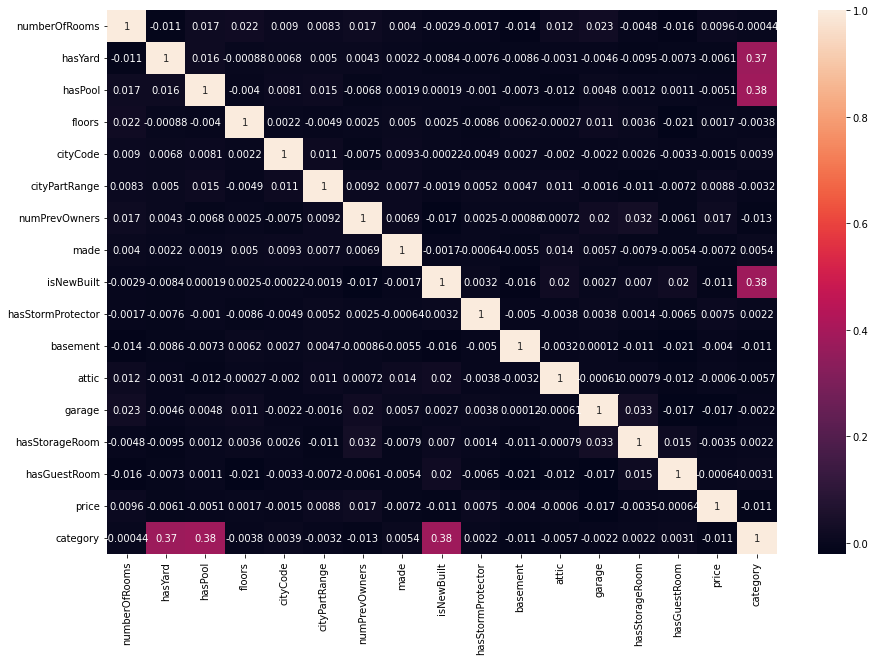

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))
hm = sns.heatmap(trainData.corr(), annot = True)
plt.show()

# Random Forest Classifier

In [180]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def RandomForest(xtrain,xtest,ytrain,ytest):
    """Write a function to train a machine learning model to get the test accuracy of 100%. 
    You are free to use any classication model such as Decision Tree, 
    Random Forest, KNN, SVM..etc. """
    # YOUR CODE HERE
    model = RandomForestClassifier()
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    accuracy = accuracy_score(ytest, ypred)
    print(accuracy*100)
    return accuracy*100
    raise NotImplementedError()

In [181]:
# Check you solution by running this cell
import math
assert math.isclose(RandomForest(xtrain,xtest,ytrain,ytest), 100.0, rel_tol = 0.05)

100.0


In [193]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def DecisionTree(xtrain,xtest,ytrain,ytest):
    """Write a function to train a machine learning model to get the test accuracy of 100%. 
    You are free to use any classication model such as Decision Tree, 
    Random Forest, KNN, SVM..etc. """
    # YOUR CODE HERE
    model = DecisionTreeClassifier()
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    accuracy = accuracy_score(ytest, ypred)
    print(accuracy*100)
    return accuracy*100
    raise NotImplementedError()

In [194]:
# Check you solution by running this cell
import math
assert math.isclose(DecisionTree(xtrain,xtest,ytrain,ytest), 100.0, rel_tol = 0.05)

100.0


Random Forest Classifier and decision tree are both reached 100 accuracy

# Support Vector Machine

In [187]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

def Support_Vector_Machine(xtrain,xtest,ytrain,ytest):
    """Write a function to train a machine learning model to get the test accuracy of 100%. 
    You are free to use any classication model such as Decision Tree, 
    Random Forest, KNN, SVM..etc. """
    # YOUR CODE HERE
    model = SVC()
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    accuracy = accuracy_score(ytest, ypred)
    print(accuracy*100)
    return accuracy*100
    raise NotImplementedError()

In [188]:
# Check you solution by running this cell
import math
assert math.isclose(Support_Vector_Machine(xtrain,xtest,ytrain,ytest), 100.0, rel_tol = 0.05)

87.2


AssertionError: ignored

# K Nearest Neighbor

In [190]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def KNeighbors(xtrain,xtest,ytrain,ytest):
    """Write a function to train a machine learning model to get the test accuracy of 100%. 
    You are free to use any classication model such as Decision Tree, 
    Random Forest, KNN, SVM..etc. """
    # YOUR CODE HERE
    model = KNeighborsClassifier()
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    accuracy = accuracy_score(ytest, ypred)
    print(accuracy*100)
    return accuracy*100
    raise NotImplementedError()

In [191]:
# Check you solution by running this cell
import math
assert math.isclose(KNeighbors(xtrain,xtest,ytrain,ytest), 100.0, rel_tol = 0.05)

86.15


AssertionError: ignored